### Write a program in python on any dataset of ur choice and apply filter feature selection technique that is applicable on it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
data=load_iris()

In [3]:
df=pd.DataFrame(data.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.columns=data.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target']=data.target
corr=df.corr()['target']
corr

sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
Name: target, dtype: float64

<AxesSubplot:>

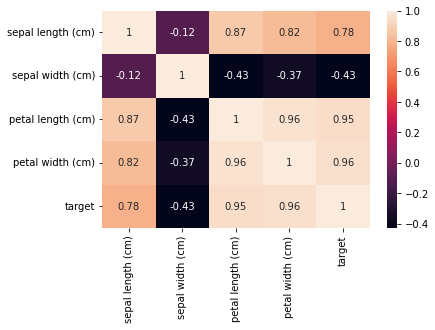

In [6]:
sns.heatmap(df.corr(method='pearson'),annot=True)

In [7]:
from sklearn.feature_selection import SelectKBest,f_classif,chi2

In [8]:
X=df.drop('target',axis=1)
y=df.target

In [9]:
model = SelectKBest(chi2,k=2)
new=model.fit(X,y)
X_new=new.transform(X)

In [10]:
cols=new.get_support(indices=True)

In [11]:
features_df_new=X.iloc[:,cols]
features_df_new

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

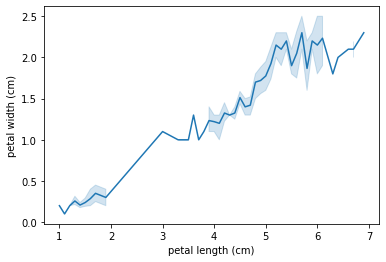

In [12]:
sns.lineplot(x=features_df_new['petal length (cm)'],y=df['petal width (cm)'])

In [13]:
mod=SelectKBest(f_classif,k=2)
new1=mod.fit(X,y)
X_1=new1.transform(X)
X_1.shape

(150, 2)

In [14]:
column=new1.get_support(indices=True)

In [15]:
features_df_new1=X.iloc[:,column]
features_df_new1

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

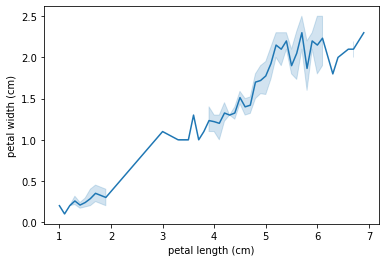

In [16]:
sns.lineplot(x=features_df_new1['petal length (cm)'],y=df['petal width (cm)'])